In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

In [4]:
# Lets download some US large cap tech data, about ten years worth
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2007')
amazon = data.DataReader('AMZN', 'yahoo',start='1/1/2007')
google = data.DataReader('GOOG', 'yahoo',start='1/1/2007')

In [5]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,232.129913,237.440018,229.694046,232.921951,232.921951,15470700
2007-01-04,233.624313,241.071411,233.300537,240.727692,240.727692,15834200
2007-01-05,240.349106,242.839783,238.162308,242.685349,242.685349,13795600
2007-01-08,242.934418,244.020355,240.199677,240.887100,240.887100,9544400
2007-01-09,241.818604,243.213379,239.701538,241.843506,241.843506,10803000


In [6]:
# We can see that the data has open, high, low, close, adjusted close, and volume
# For most of our purposes we are going to look at adjusted close

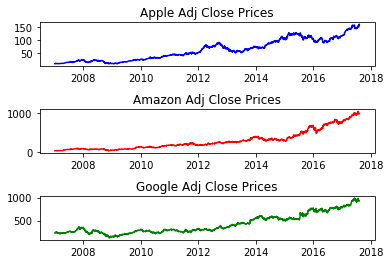

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=False, sharey=False)
ax1.set_title('Apple Adj Close Prices')
ax2.set_title('Amazon Adj Close Prices')
ax3.set_title('Google Adj Close Prices')
ax1.plot(apple['Adj Close'], '-b')
ax2.plot(amazon['Adj Close'], '-r')
ax3.plot(google['Adj Close'], '-g')
f.subplots_adjust(hspace=1)
plt.show()

In [8]:
# As we can see from the above, all securities have done well over the past decade.
# You can clearly see a google and apple dive in late 2008 closely following the rest of the markets

In [9]:
apple['Pct Returns'] = apple['Adj Close'].pct_change()
amazon['Pct Returns'] = amazon['Adj Close'].pct_change()
google['Pct Returns'] = google['Adj Close'].pct_change()

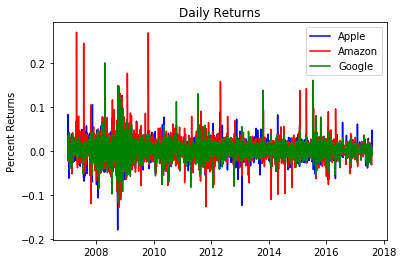

In [10]:
plt.plot(apple['Pct Returns'], '-b', label = "Apple")
plt.plot(amazon['Pct Returns'], '-r', label = "Amazon")
plt.plot(google['Pct Returns'], '-g', label = "Google")
plt.ylabel('Percent Returns')
plt.title('Daily Returns')
plt.legend(loc = 'upper right')
plt.show()

In [11]:
# Fist of all, lets take a look at the volatility throughout their existance

In [12]:
appleVol = apple['Pct Returns'].std()*np.sqrt(252) # 252 due to there being approximately 252 trading days per year
amazonVol = amazon['Pct Returns'].std()*np.sqrt(252)
googleVol = google['Pct Returns'].std()*np.sqrt(252)

print "Apple - %.5f, Amazon - %.5f, Google - %.5f" % (appleVol, amazonVol, googleVol)

Apple - 0.32237, Amazon - 0.40444, Google - 0.29308


In [13]:
#  What does this mean?  Lets take a look at a high volitile and a low volitile stock to put it in perspective
pacw = data.DataReader('PACW', 'yahoo',start='1/1/2007')  # High Vol
spy = data.DataReader('SPY', 'yahoo',start='1/1/2007')  # Low Vol, also the S&P 500 ETF

In [14]:
pacwVol = pacw['Adj Close'].pct_change().std()*np.sqrt(252)
spyVol = spy['Adj Close'].pct_change().std()*np.sqrt(252)
print "PACW (High) - %.5f, SPY (Benchmark, Low Vol) - %.5f" % (pacwVol, spyVol)

PACW (High) - 0.47394, SPY (Benchmark, Low Vol) - 0.20314


In [15]:
# Now that we know how risky these names are, lets see how much we would make if we can go back in time and invest in them
# I am going to look at dollar values because the above is abstract and dollars are easy for me to think about
# I am also a little weary of doing the same operation over and over, lets make one big dataframe

In [16]:
returnsDF = pd.DataFrame({
    'AAPL' : pd.Series(apple['Adj Close']),
    'AMZN' : pd.Series(amazon['Adj Close']),
    'GOOG' : pd.Series(google['Adj Close']),
    'PACW' : pd.Series(pacw['Adj Close']),
    'SPY' : pd.Series(spy['Adj Close'])
})

returnsDF.head()

,AAPL,AMZN,GOOG,PACW,SPY
Date,,,,,
2007-01-03,10.812462,38.700001,232.921951,37.962383,113.757355
2007-01-04,11.052453,38.900002,240.727692,37.911625,113.998749
2007-01-05,10.973743,38.369999,242.685349,36.962021,113.089493
2007-01-08,11.027935,37.500000,240.887100,36.933037,113.612480
2007-01-09,11.944029,37.779999,241.843506,36.904030,113.515953


In [17]:
def dollar_return(prices, iv):
    return iv * ((prices[-1] / prices[0]) - 1)

In [18]:
initInvestment = 1000
returns = returnsDF.apply(dollar_return, args = (initInvestment, ), axis = 0)
print returns

AAPL    13687.681492
AMZN    24640.051534
GOOG     2990.006013
PACW      260.985091
SPY      1178.672280
dtype: float64


In [19]:
# Cool, Amazon has done amazing, but while all have garnered a positive return, PACW was failed to beat the market
# Before I go too far... let me remind myself about lambda functions

In [20]:
returnsDF.apply(lambda x : initInvestment * ((x[-1] / x[1]) - 1))

AAPL    13368.755787
AMZN    24508.225424
GOOG     2860.627655
PACW      262.673362
SPY      1174.058910
dtype: float64

In [21]:
# Sick
# Not sure how this is going to work, but lets see if there are any correlations to these stock prices

In [22]:
from scipy.stats.stats import pearsonr

In [23]:
pctReturnsDF = pd.DataFrame({
    'AAPL' : pd.Series(apple['Pct Returns']).dropna(),  # This is to remove the first element, na
    'AMZN' : pd.Series(amazon['Pct Returns']).dropna(),
    'GOOG' : pd.Series(google['Pct Returns']).dropna(),
    'PACW' : pd.Series(pacw['Adj Close'].pct_change()).dropna(),
    'SPY' : pd.Series(spy['Adj Close'].pct_change()).dropna()
})


for k in pctReturnsDF:
    for km in pctReturnsDF:
        if k == km: continue # Any correlation with itself is 1        
        print "%s, %s - %.5f" % (k, km, pearsonr(pctReturnsDF[k], pctReturnsDF[km])[0])

AAPL, AMZN - 0.43943
AAPL, GOOG - 0.52973
AAPL, PACW - 0.36536
AAPL, SPY - 0.59787
AMZN, AAPL - 0.43943
AMZN, GOOG - 0.52443
AMZN, PACW - 0.37267
AMZN, SPY - 0.54812
GOOG, AAPL - 0.52973
GOOG, AMZN - 0.52443
GOOG, PACW - 0.40521
GOOG, SPY - 0.63737
PACW, AAPL - 0.36536
PACW, AMZN - 0.37267
PACW, GOOG - 0.40521
PACW, SPY - 0.64654
SPY, AAPL - 0.59787
SPY, AMZN - 0.54812
SPY, GOOG - 0.63737
SPY, PACW - 0.64654


In [24]:
# Although intersting, SPY is definately cheating as its a tracker for the overall market
# It is good to put your investments returns vs a benchmark, but lets find some more interesting examples
# Such as Apple and Google

In [25]:
compReturns = pd.DataFrame({
    'AAPL' : pctReturnsDF.AAPL.dropna(),
    'GOOG' : pctReturnsDF.GOOG.dropna(),
})

# Lets compare
compReturns['Diff'] = compReturns.AAPL - compReturns.GOOG

In [26]:
#  Although there are certainly outliers, I suspect the mean is around zero, but lets find out

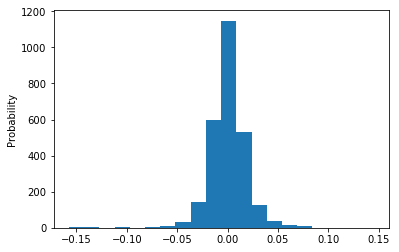

In [27]:
#%matplotlib inline
plt.hist(compReturns['Diff'], normed=False, bins=20)
plt.ylabel('Probability');
plt.show()

In [28]:
# This is kinda awful to be honest, lets winsorize the data at two sigma

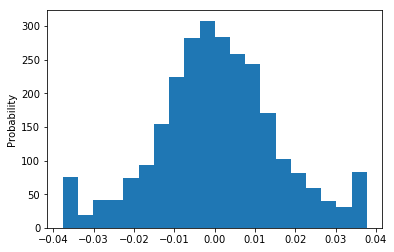

In [29]:
winzoationFactor = 2
sigma = np.std(compReturns['Diff'])
winData = compReturns['Diff'].apply(lambda x: x if abs(x) < winzoationFactor * sigma else np.sign(x) * winzoationFactor * sigma)
plt.hist(winData, normed=False, bins=20)
plt.ylabel('Probability');
plt.show()

In [30]:
# Neat!  This shows a pretty normal distribution with two wings at the end that show extreme events at <5% occurances
# I wonder if there would be a way to take advantage of this!  Lets calculate a return for a portfolio if we do 50:50

In [31]:
newInvestment = 100000
weights = [0.5, 0.5]
rorAAPL = (compReturns.AAPL + 1).product() - 1  # subtracting 1 to only returns profits
rorGOOG = (compReturns.GOOG + 1).product() - 1
evenWeightReturns = newInvestment*(weights[0]*rorAAPL + weights[1]*rorGOOG)
print evenWeightReturns

833884.375238


In [32]:
# What happens if we create a strategy that works on mean reversion.
# If 'Diff' is greater than 2*sigma we will invest in Google and sell it at the mean
# If 'Diff' is less than 2*sigma we will invest in Apple and sell it at the mean
# I am going to use a forloop, but I am sure that there is a more effective way of computing
# I will also assume no investment on the fist day since there will be no 'returns' data on this
# I am also going to compute a rolling split to assume no future knowledge
# Goal is to beat the 817k realized above
# I am going to assume long only portfolio, shorting these names seems ill advised :)

In [33]:
spreadTradingDF = pd.DataFrame({
    'AAPLclose' : pd.Series(apple['Adj Close'])[1:],
    'GOOGclose' : pd.Series(google['Adj Close'])[1:],
    'AAPLreturns' : compReturns.AAPL,
    'GOOGreturns' : compReturns.GOOG,
    'Diff' : compReturns.AAPL - compReturns.GOOG
})

In [34]:
newInvestment = 100000  # We are going to allow for fractional shares
originalInvestment = newInvestment
startingTime = 100
shares = 0
tradeSigma = 0  # We will buy when delta is over two sigma
sellSigma = 0
holdTime = 5  # For tax and turnover considerations, we hold onto securities for min holdTime days
nameInvested = ''
days = 0

for index, row in spreadTradingDF.iloc[startingTime - 1:].iterrows():
    varianceAtTime = np.std(spreadTradingDF['Diff'].loc[:index])
    if shares == 0:  # this means I am not invested
        if tradeSigma * varianceAtTime <= abs(row.Diff):  # this means I am going to invest because we are outside threshold
            if row.Diff > 0:  # This means AAPL is above, so I postlate that Google is undervalued
                # print "Buying GOOG at %.5f" % (row.GOOGclose) 
                shares = newInvestment / row.GOOGclose
                nameInvested = 'GOOG'
            else: # This means GOOG is above, so I postulate that Apple is undervalued
                # print "Buying AAPL at %.5f" % (row.AAPLclose) 
                shares = newInvestment / row.AAPLclose
                nameInvested = 'AAPL'
    if sellSigma * varianceAtTime > (row.Diff) and days > holdTime: # this means I am invested and want to sell
            if nameInvested == 'AAPL':  # This means we hold Apple, we should sell
                # print "Selling AAPL at %.5f" % (row.AAPLclose) 
                newInvestment = row.AAPLclose * shares
            if nameInvested == 'GOOG':  # This means we hold Google, we should sell
                # print "Selling GOOG at %.5f" % (row.GOOGclose) 
                newInvestment = row.GOOGclose * shares
            shares = 0
            nameInvested = ''
            days = 0
    days += 1

if shares > 0:
    if nameInvested == 'AAPL': newInvestment = shares * spreadTradingDF.AAPLclose[-1]
    else: newInvestment = shares * spreadTradingDF.GOOGclose[-1]

print newInvestment - originalInvestment

927835.189548


In [35]:
# This is interesting!
# As you mess around with the buy/sell side sigma and the time you can see very different return sequences
# At T=30, bSigma = 2, and sSigma = 0.5, we actually garner less returns than if we just did the equal weighted portfolio!
# If we reduce bSigma, sSigma = 0 (buying when one has slightly outperformed the other) and setting T=5 we finally make more
#  than the equal weighted portfolio, but we would be hammered by taxes at that point.  Short term arbitrage is expensive!
#  Last thing I am going to do is make this into a program so that one could possibly feed a combination and get most optimal

In [36]:
import itertools as it  # This will allow us to make an arragement of arguements

In [54]:
data = {
    'holdTime' : np.linspace(5, 30, 6),
    'sellSigma' : np.linspace(0, 3, 4),
    'tradeSigma' : np.linspace(0, 3, 4),
}

dataComb = list(it.product(*(data[Name] for Name in sorted(data))))
# this is a list of all combinations of the data elements, 96 in total (6*4*4), in alpha order hold, sell, trade

In [55]:
def investmentTool(lst, spreadTradingDF):
    
    newInvestment = 100000  # We are going to allow for fractional shares
    originalInvestment = newInvestment
    startingTime = 100
    shares = 0
    tradeSigma = lst[2]
    sellSigma = lst[1]
    holdTime = lst[0]
    nameInvested = ''
    days = 0

    for index, row in spreadTradingDF.iloc[startingTime - 1:].iterrows():
        varianceAtTime = np.std(spreadTradingDF['Diff'].loc[:index])
        if shares == 0:  # this means I am not invested
            if tradeSigma * varianceAtTime <= abs(row.Diff):  # this means I am going to invest because we are outside threshold
                if row.Diff > 0:  # This means AAPL is above, so I postlate that Google is undervalued
                    # print "Buying GOOG at %.5f" % (row.GOOGclose) 
                    shares = newInvestment / row.GOOGclose
                    nameInvested = 'GOOG'
                else: # This means GOOG is above, so I postulate that Apple is undervalued
                    # print "Buying AAPL at %.5f" % (row.AAPLclose) 
                    shares = newInvestment / row.AAPLclose
                    nameInvested = 'AAPL'
        if sellSigma * varianceAtTime > (row.Diff) and days > holdTime: # this means I am invested and want to sell
                if nameInvested == 'AAPL':  # This means we hold Apple, we should sell
                    # print "Selling AAPL at %.5f" % (row.AAPLclose) 
                    newInvestment = row.AAPLclose * shares
                if nameInvested == 'GOOG':  # This means we hold Google, we should sell
                    # print "Selling GOOG at %.5f" % (row.GOOGclose) 
                    newInvestment = row.GOOGclose * shares
                shares = 0
                nameInvested = ''
                days = 0
        days += 1

    if shares > 0:
        if nameInvested == 'AAPL': newInvestment = shares * spreadTradingDF.AAPLclose[-1]
        else: newInvestment = shares * spreadTradingDF.GOOGclose[-1]
    
    return newInvestment/originalInvestment

In [67]:
output = [investmentTool(spreadTradingDF, i) for i in dataComb]

In [83]:
dispData = pd.Series(sorted(zip(dataComb, output), key=lambda l: l[1], reverse=True))

In [85]:
for i in dispData.head():
    print "Buying at %d, selling at %d, holding for least %d, returns %.5f" % (i[0][2], i[0][1], i[0][0], i[1])

Buying at 0, selling at 3, holding for least 30, returns 17.90237
Buying at 0, selling at 3, holding for least 10, returns 10.84462
Buying at 0, selling at 0, holding for least 5, returns 10.27835
Buying at 0, selling at 0, holding for least 10, returns 10.13527
Buying at 0, selling at 1, holding for least 25, returns 8.18421


In [86]:
# Awesome!  Looks like we could have beaten the even portfolio of 9.27 pretty handily with the top strategy.
# They all have buying at 0 though which looks odd to me...
#   This means that whenever there is any outperformace on one stock above the mean they invest in the other.
#   There may be some nuances here that I am not appreciating, but the primary reason I am doing this is because I wanted
#   to relearn some python and figure out some of the tricks with pandas.  There is a lot more to learn for sure!